In [1]:
import pandas as pd 
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
path =r'C:\Users\623737\Machine_Learning\IPL\Most_Wickets_KKR' # use your path
allFiles = glob.glob(path + "/*.csv")
df_ms_wickets = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=0)
    team = (file_.rsplit('.csv', 1)[0]).rsplit('_', 2)[1]
    year = (file_.rsplit('.csv', 1)[0]).rsplit('_', 1)[1]
    df['team'] = team
    df['year'] = year
    list_.append(df)
df_ms_wickets = pd.concat(list_)

In [3]:
df_ms_wickets.head(2)

,Player,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5,team,year
0,Umar Gul,6.0,6.0,22.3,1.0,184.0,12.0,4/23,15.33,8.17,11.2,1.0,0.0,KKR,2008
1,AB Dinda,13.0,12.0,39.0,0.0,260.0,9.0,3/33,28.88,6.66,26.0,0.0,0.0,KKR,2008


In [4]:
df_ms_wickets[df_ms_wickets.isnull()].head(2)

,Player,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5,team,year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_ms_wickets.dropna(axis=0,inplace = True)
df_ms_wickets.isnull().sum()

Player    0
Mat       0
Inns      0
Overs     0
Mdns      0
Runs      0
Wkts      0
BBI       0
Ave       0
Econ      0
SR        0
4         0
5         0
team      0
year      0
dtype: int64

In [6]:
df_ms_wickets.dtypes

Player     object
Mat       float64
Inns      float64
Overs     float64
Mdns      float64
Runs      float64
Wkts      float64
BBI        object
Ave        object
Econ      float64
SR         object
4         float64
5         float64
team       object
year       object
dtype: object

In [7]:
df_ms_wickets[['Ave','Player','SR']][df_ms_wickets['Ave']=='-']

,Ave,Player,SR
11,-,Iqbal Abdulla,-
13,-,AD Mathews,-
14,-,DJ Hussey,-
15,-,Mashrafe Mortaza,-
14,-,RS Gavaskar,-
15,-,MB Parmar,-
16,-,SC Ganguly,-
17,-,DJ Hussey,-
8,-,RN ten Doeschate,-
9,-,MK Tiwary,-


In [8]:
#replacing SR = - with zero
df_ms_wickets['SR'][df_ms_wickets['SR']=='-'] = 0
#replacing Ave = - with zero
df_ms_wickets['Ave'][df_ms_wickets['Ave']=='-'] = 0
df_ms_wickets[['Ave','Player','SR']][df_ms_wickets['Ave']=='-']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Ave,Player,SR


In [9]:
cols = ['Mat' , 'Inns' , 'Mdns' , 'Runs' , 'Wkts' , '4' , '5']
df_ms_wickets[cols] = df_ms_wickets[cols].astype(int)
float_col = ['Ave','SR']
df_ms_wickets[float_col] = df_ms_wickets[float_col].astype(float)
df_ms_wickets.dtypes

Player     object
Mat         int32
Inns        int32
Overs     float64
Mdns        int32
Runs        int32
Wkts        int32
BBI        object
Ave       float64
Econ      float64
SR        float64
4           int32
5           int32
team       object
year       object
dtype: object

In [10]:
df_ms_wickets = df_ms_wickets.reset_index(drop=True)

# Top 10 Wicket takers for KKR in all Season #

In [11]:
wickets_by_player = df_ms_wickets.groupby('Player', as_index=False).agg({"Wkts": "sum"})
wickets_by_player.sort_values(by = ['Wkts'], ascending=[False]).head(10)

,Player,Wkts
53,SP Narine,95
58,UT Yadav,48
55,Shakib Al Hasan,43
40,PP Chawla,42
21,JH Kallis,42
26,L Balaji,33
41,R Bhatia,32
29,M Morkel,32
3,AD Russell,30
18,Iqbal Abdulla,28


# Maximum Wicket Taker in a Season #

In [12]:
df_ms_wickets[df_ms_wickets.Wkts == max(df_ms_wickets.Wkts)][['year','Player','Mat','Econ','Overs','Wkts']]

,year,Player,Mat,Econ,Overs,Wkts
57,2012,SP Narine,15,5.47,59.1,24


# Most Overs bowled by players - Top 10 #

In [13]:
overs_by_player = df_ms_wickets.groupby('Player', as_index=False).agg({"Overs": "sum"})
overs_by_player.sort_values(by = ['Overs'], ascending=[False]).head(10)

,Player,Overs
53,SP Narine,320.5
58,UT Yadav,161.3
55,Shakib Al Hasan,153.3
21,JH Kallis,153.0
40,PP Chawla,129.5
41,R Bhatia,128.6
26,L Balaji,124.3
29,M Morkel,111.3
17,I Sharma,110.1
18,Iqbal Abdulla,101.8


## Top 10 Economical Bowlers in Seasons (minimum 40 overs bowled in a season)  ##

In [14]:
df_ms_wickets[df_ms_wickets.Overs>=40].sort_values(by = 'Econ', ascending = True).head(10)[['year','Player','Econ','Overs','Wkts','BBI']]

,year,Player,Econ,Overs,Wkts,BBI
70,2013,SP Narine,5.46,64.0,22,4/13
57,2012,SP Narine,5.47,59.1,24,5/19
46,2011,Iqbal Abdulla,6.10,50.0,16,3/24
85,2014,SP Narine,6.35,64.0,21,4/20
88,2014,Shakib Al Hasan,6.68,50.0,11,2/22
12,2009,I Sharma,6.90,43.0,11,2/15
129,2017,SP Narine,6.98,59.0,10,2/29
112,2016,SP Narine,7.12,42.4,11,3/26
59,2012,R Bhatia,7.31,53.1,13,2/14
71,2013,JH Kallis,7.43,53.0,16,3/13


## Top 10 Expensive Bowlers in Seasons (minimum 40 overs bowled in a season)

In [15]:
df_ms_wickets[df_ms_wickets.Overs>=40].sort_values(by = 'Econ', ascending = False).head(10)[['year','Player','Econ','Overs','Wkts','BBI']]

,year,Player,Econ,Overs,Wkts,BBI
100,2015,UT Yadav,9.09,42.0,10,3/33
125,2017,CR Woakes,8.77,44.0,17,3/6
126,2017,UT Yadav,8.45,48.3,17,4/33
49,2011,L Balaji,8.33,44.3,10,3/15
128,2017,Kuldeep Yadav,8.29,41.0,12,2/25
89,2014,UT Yadav,8.15,45.0,11,3/13
97,2015,AD Russell,7.96,40.4,14,3/32
3,2008,I Sharma,7.80,42.1,7,1/7
72,2013,L Balaji,7.74,50.0,12,3/19
87,2014,M Morkel,7.64,48.0,12,2/20


# KKR Bowling performence Comparison

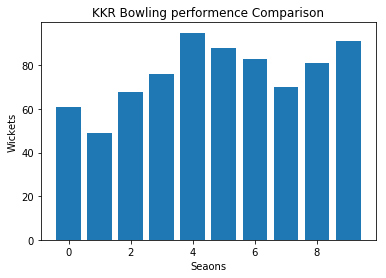

In [16]:
kkr_wkts_by_seasons = df_ms_wickets.groupby('year', as_index=False).agg({"Wkts": "sum"})
seaons = kkr_wkts_by_seasons['year']
Wickets = kkr_wkts_by_seasons['Wkts']
y_pos = np.arange(len(seaons))
plt.bar(y_pos,Wickets)
#plt.xticks(y_pos,year) 
plt.ylabel('Wickets')
plt.xlabel('Seaons')
plt.title('KKR Bowling performence Comparison')
plt.show()

In [17]:
kkr_wkts_by_seasons

,year,Wkts
0,2008,61
1,2009,49
2,2010,68
3,2011,76
4,2012,95
5,2013,88
6,2014,83
7,2015,70
8,2016,81
9,2017,91


# KKR - Bowling Details Per Seaon

In [18]:
bowling_by_seaons = df_ms_wickets.groupby('year', as_index=False).agg({"Overs": "sum","Mdns": "sum","Runs":"sum","Wkts":"sum","Econ": "mean","SR": "mean","4":"sum","5":"sum"}) 
bowling_by_seaons['Standing']=['League stage','League stage','League stage','Playoffs','Champions','League stage','Champions','League stage','Playoffs','Semi-finalists']
bowling_by_seaons

,year,Overs,Mdns,Runs,Wkts,Econ,SR,4,5,Standing
0,2008,212.8,2,1657,61,7.817500,21.291667,2,0,League stage
1,2009,247.9,0,1920,49,8.413125,28.250000,0,0,League stage
2,2010,266.9,1,2156,68,8.567222,17.622222,1,0,League stage
3,2011,284.8,2,2029,76,7.800909,17.654545,0,0,Playoffs
4,2012,330.2,3,2315,95,7.743846,21.200000,2,1,Champions
5,2013,312.0,4,2277,88,8.346000,19.566667,2,0,League stage
6,2014,316.3,3,2379,83,8.030833,21.266667,2,0,Champions
7,2015,248.4,1,2030,70,8.783077,23.292308,3,0,League stage
8,2016,281.6,2,2278,81,8.448667,21.340000,1,0,Playoffs
9,2017,301.0,0,2485,91,8.653636,19.763636,1,0,Semi-finalists


# Stats When KKR is Champions 

In [19]:
bowling_by_seaons[bowling_by_seaons['Standing']=='Champions']

,year,Overs,Mdns,Runs,Wkts,Econ,SR,4,5,Standing
4,2012,330.2,3,2315,95,7.743846,21.200000,2,1,Champions
6,2014,316.3,3,2379,83,8.030833,21.266667,2,0,Champions


# KKR Bowling performence Comparison - Economy Rates

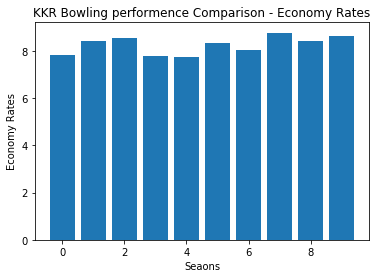

In [20]:
seaons = bowling_by_seaons['year']
Wickets = bowling_by_seaons['Econ']
y_pos = np.arange(len(seaons))
plt.bar(y_pos,Wickets)
#plt.xticks(y_pos,year) 
plt.ylabel('Economy Rates')
plt.xlabel('Seaons')
plt.title('KKR Bowling performence Comparison - Economy Rates')
plt.show()